## ✅ Topic 2: Probability with Probability Distributions

Using the **Social Media Addiction vs Relationships** dataset, we will:

### 🎯 Goals:

* Understand **probability concepts**.
* Estimate **probability distributions** for variables like:

  * `Addicted_Score` (Discreet, \~Poisson/Binomial)
  * `Avg_Daily_Usage_Hours` (Continuous, \~Normal)
* Compute **empirical probabilities**
* Visualize **PDF, PMF, CDF**
* Apply **real-world examples** to explain how distributions help in decision-making

# 📊 Probability & Distributions Case Study
# Dataset: Social Media Addiction vs Relationships

In [2]:
#!/bin/bash
!curl -L -o social-media-addiction-vs-relationships.zip\
  https://www.kaggle.com/api/v1/datasets/download/adilshamim8/social-media-addiction-vs-relationships
!unzip social-media-addiction-vs-relationships.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  7851  100  7851    0     0  15895      0 --:--:-- --:--:-- --:--:-- 15895
Archive:  social-media-addiction-vs-relationships.zip
  inflating: Students Social Media Addiction.csv  


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
# Load dataset
df = pd.read_csv("Students Social Media Addiction.csv")

In [5]:
# Preview
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


### 📌 1. Empirical Probability Example

**Q: What is the probability a student uses social media more than 5 hours/day?**

In [7]:
prob = (df['Avg_Daily_Usage_Hours'] > 5).mean()
print(f" P(Usage > 5 hours) = {round(prob, 3)}")

 P(Usage > 5 hours) = 0.417


### 📌 2. Continuous Distribution: Normal Approximation (Usage Hours)


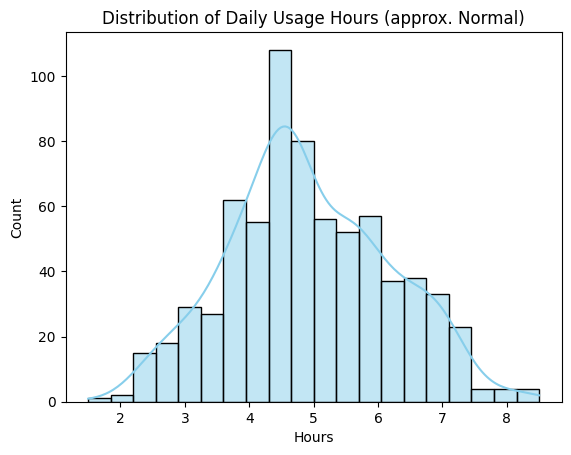

In [8]:
sns.histplot(df['Avg_Daily_Usage_Hours'], kde=True, bins=20, color="skyblue")
plt.title("Distribution of Daily Usage Hours (approx. Normal)")
plt.xlabel("Hours")
plt.show()

In [9]:
# Fit normal dist
mu, std = stats.norm.fit(df['Avg_Daily_Usage_Hours'])
print(f"Mean = {mu:.2f}, Std Dev = {std:.2f}")

Mean = 4.92, Std Dev = 1.26


In [10]:
# Probability P(Usage > 6)
p = 1 - stats.norm.cdf(6, mu, std)
print(f"📌 P(Usage > 6 hours) = {round(p, 3)}")

📌 P(Usage > 6 hours) = 0.195


### 📌 3. Discrete Distribution: Poisson (Addicted\_Score)

Assume Addicted\_Score follows a Poisson distribution for simplicity:

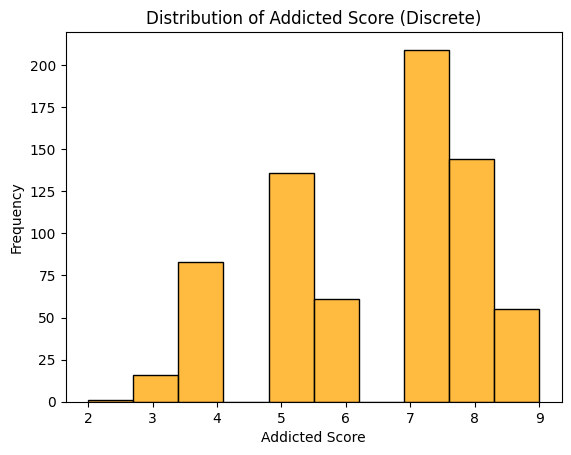

In [11]:
sns.histplot(df['Addicted_Score'], kde=False, bins=10, color='orange')
plt.title("Distribution of Addicted Score (Discrete)")
plt.xlabel("Addicted Score")
plt.ylabel("Frequency")
plt.show()

In [12]:
# λ (mean)
lambda_poisson = df['Addicted_Score'].mean()
print(f"Estimated λ = {round(lambda_poisson, 2)}")

Estimated λ = 6.44


In [13]:
# P(X = 7)
p_7 = stats.poisson.pmf(7, mu=lambda_poisson)
print(f" P(Addicted Score = 7) ≈ {round(p_7, 3)}")

 P(Addicted Score = 7) ≈ 0.145


### 📌 4. Cumulative Distribution Function (CDF)

In [14]:
# CDF of Usage Hours
x = np.linspace(0, 10, 100)
cdf_vals = stats.norm.cdf(x, mu, std)

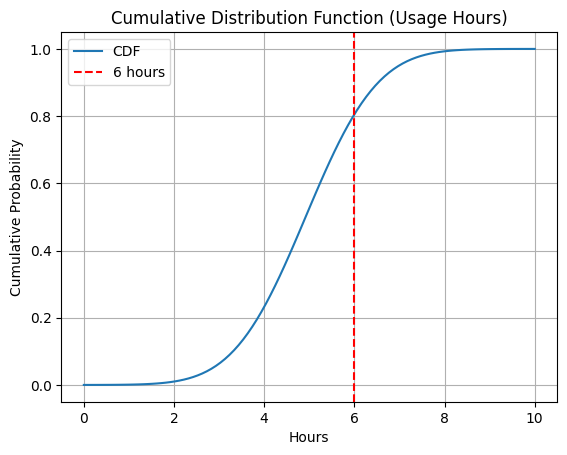

In [15]:
plt.plot(x, cdf_vals, label="CDF")
plt.axvline(6, color='red', linestyle='--', label='6 hours')
plt.title("Cumulative Distribution Function (Usage Hours)")
plt.xlabel("Hours")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid()
plt.show()

### 📌 5. Bernoulli/Binomial Distribution Example

**Binary Feature:** Affects Academic Performance (Yes/No)

In [16]:
# Convert to binary
df['Affects_Academic_Performance'] = df['Affects_Academic_Performance'].map({'Yes': 1, 'No': 0})

In [17]:
p_success = df['Affects_Academic_Performance'].mean()
print(f" P(Affects Academic Performance = Yes) ≈ {round(p_success, 3)}")

 P(Affects Academic Performance = Yes) ≈ 0.643


In [18]:
# Binomial PMF: P(k=3 affected out of 5 students)
p_bin = stats.binom.pmf(3, n=5, p=p_success)
print(f" P(Exactly 3 out of 5 are affected) = {round(p_bin, 3)}")

 P(Exactly 3 out of 5 are affected) = 0.339


### ✅ Summary Table

| Concept               | Variable                       | Distribution       | Method Used      |
| --------------------- | ------------------------------ | ------------------ | ---------------- |
| Continuous Variable   | `Avg_Daily_Usage_Hours`        | Normal             | PDF, CDF, µ, σ   |
| Discrete Variable     | `Addicted_Score`               | Poisson            | PMF, λ           |
| Binary Outcome        | `Affects_Academic_Performance` | Bernoulli/Binomial | p, PMF           |
| Empirical Probability | `Usage > 5 hours`              | N/A                | Mean over filter |